# Titanic Survival Prediction Kaggle

In [393]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [394]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [396]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [397]:
df.drop(["PassengerId", "Name"], axis=1, inplace= True)

In [398]:
df_cat_cols = df.select_dtypes('object').columns
df_num_cols = df.select_dtypes(np.number).columns

In [399]:
df_cat_cols

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [400]:
df_num_cols

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [401]:
df.Pclass = df.Pclass.astype('object')

In [402]:
df_num_cols = df.select_dtypes(np.number).columns
df_num_cols

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [403]:
df.Parch.value_counts()


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [404]:
# combining Parch with SibsSp

In [405]:
df['depandants'] = df['SibSp'] + df['Parch']

In [406]:
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [407]:
# df_cat = df.select_dtypes(np.object).columns
# fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(20, 20))
# for i, subplot in zip(df_cat, ax.flatten()):
#     (pd.DataFrame(df[i].value_counts())).plot.pie(y = i, autopct= '%.1f%%', ax= subplot, legend= False)
# plt.show()

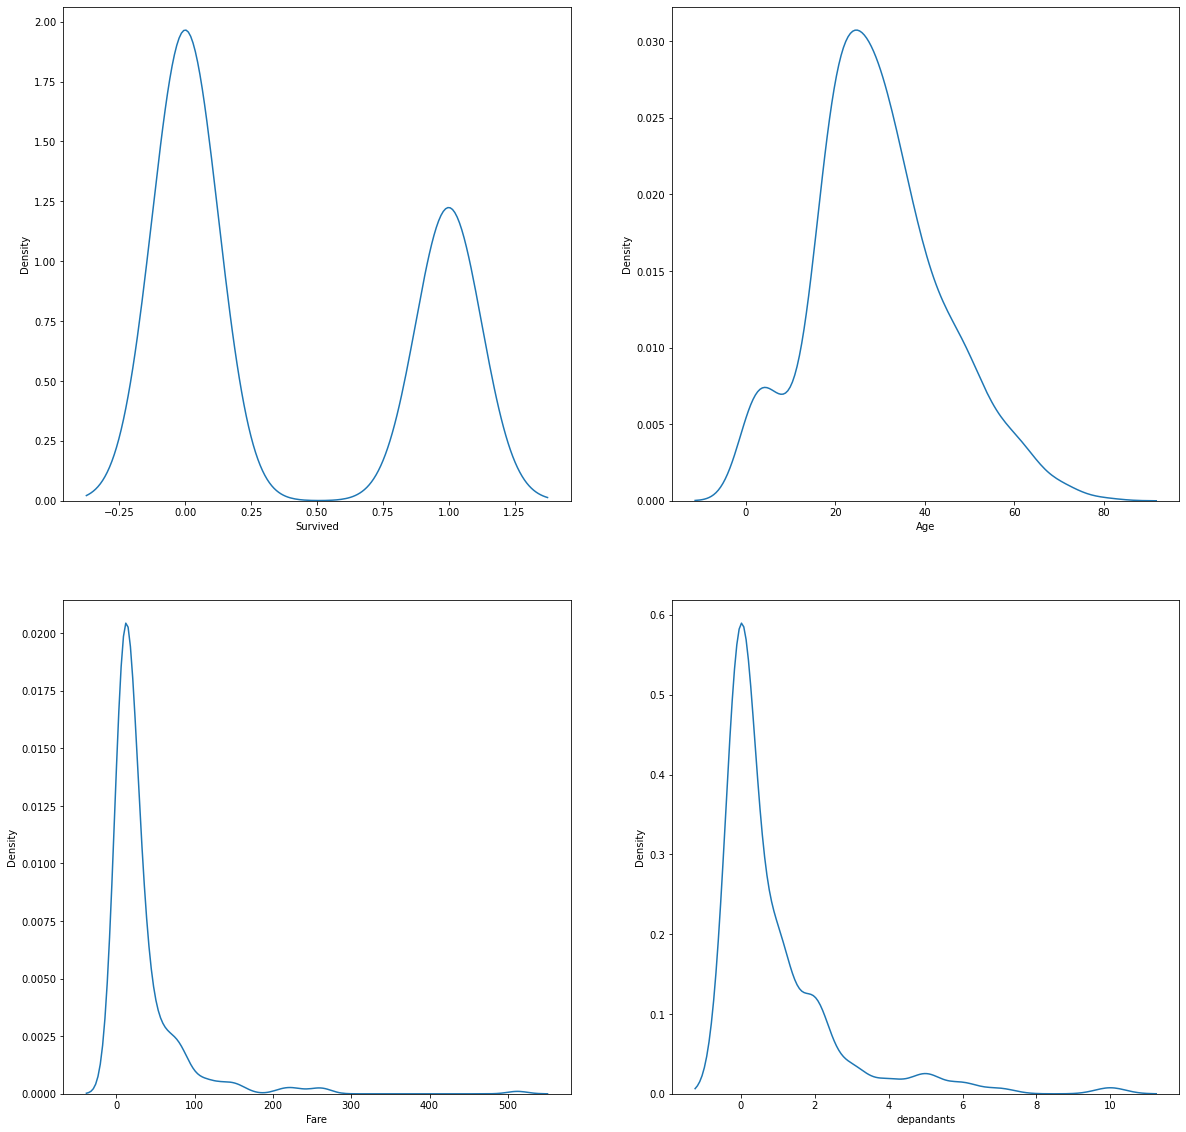

In [408]:
df_num_cols = df.select_dtypes(np.number)
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 20))

for i, subplot in zip(df_num_cols,  ax.flatten()):
    sns.kdeplot(df[i], ax=subplot)

plt.show()

<AxesSubplot:xlabel='Pclass'>

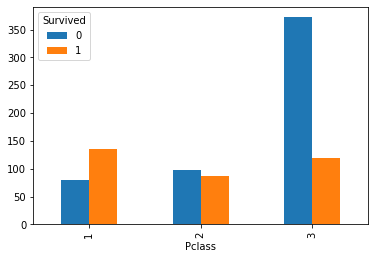

In [409]:
pd.crosstab(df.Pclass, df.Survived).plot(kind='bar')

<AxesSubplot:xlabel='Sex'>

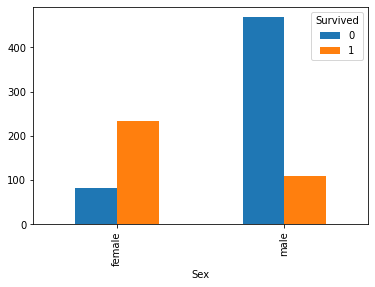

In [410]:
pd.crosstab(df.Sex, df.Survived).plot(kind='bar')

<AxesSubplot:xlabel='Age'>

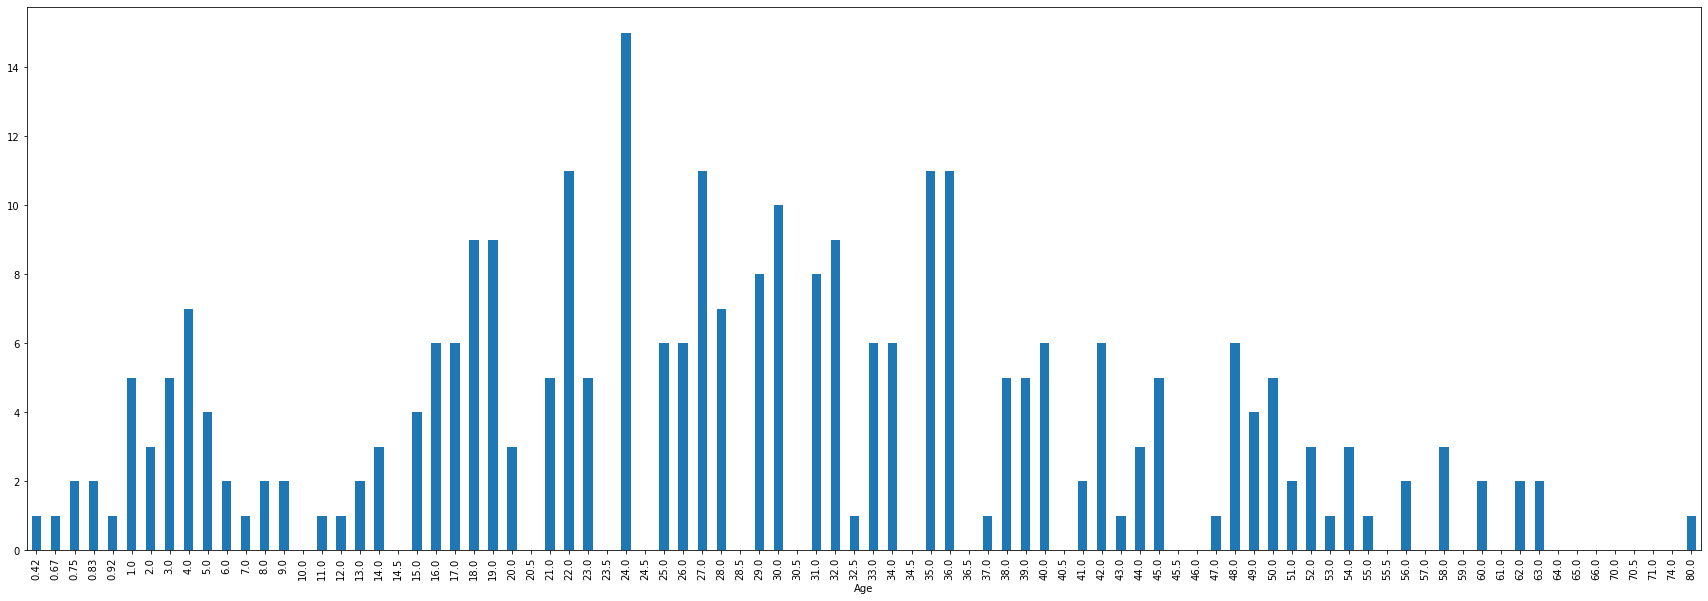

In [411]:
plt.figure(figsize=(30,10))
df.groupby(by='Age')['Survived'].sum().plot(kind='bar')

<AxesSubplot:xlabel='depandants'>

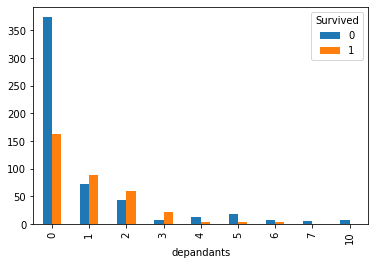

In [412]:
pd.crosstab(df.depandants, df.Survived).plot(kind='bar')

<AxesSubplot:xlabel='Survived'>

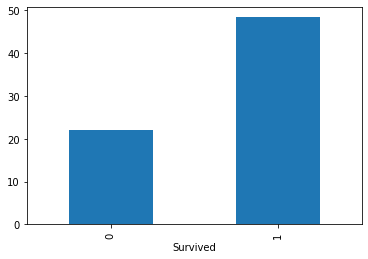

In [413]:
df.groupby(by='Survived')['Fare'].mean().plot(kind='bar')

In [414]:
# Missing Value Treatment
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Ticket          0
Fare            0
Cabin         687
Embarked        2
depandants      0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Fare'>

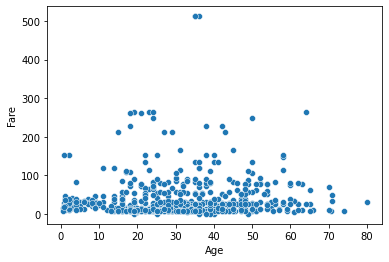

In [415]:
sns.scatterplot(data=df, x= "Age", y = "Fare")

In [416]:
df.Age = df.Age.replace(np.nan, np.mean(df.Age))

In [417]:
df.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [418]:
# Feature Engineering Ticket and cabin
pd.DataFrame(df.Ticket)

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


In [419]:
liti = []
for i in df.Ticket:
    if i.isnumeric() == True:
        liti.append(f"Nid")
    else:
        liti.append("idtick")

In [420]:
df.Ticket = liti

<AxesSubplot:xlabel='Ticket'>

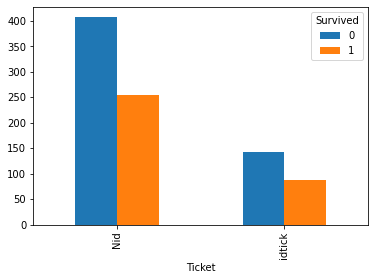

In [421]:
pd.crosstab(df.Ticket, df.Survived).plot(kind='bar')

In [422]:
licab = []
for i in df.Cabin:
    i = str(i)
    i = i[0]
    if i == 'n':
        licab.append(np.nan)
    else:
        licab.append(i)

In [423]:
df.Cabin=licab

In [424]:
df.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [425]:
df.drop("Cabin", axis=1, inplace=True)

In [426]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Ticket        0
Fare          0
Embarked      2
depandants    0
dtype: int64

In [427]:
df.Embarked = df.Embarked.fillna("S")

In [428]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Ticket        0
Fare          0
Embarked      0
depandants    0
dtype: int64

In [429]:
df_cat = df.select_dtypes(np.object).columns
df_cat

Index(['Pclass', 'Sex', 'Ticket', 'Embarked'], dtype='object')

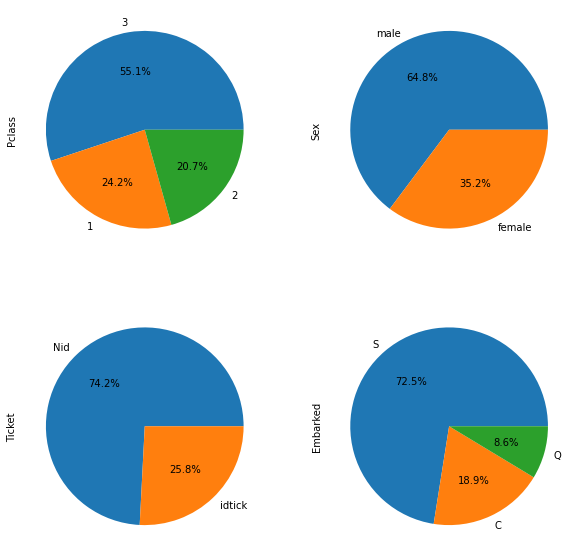

In [430]:
df_cat = df.select_dtypes("object").columns
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(10, 10))
for i, subplot in zip(df_cat, ax.flatten()):
    (pd.DataFrame(df[i].value_counts())).plot.pie(y = i, autopct= '%.1f%%', ax= subplot, legend= False)
plt.show()

In [431]:
df_ana = df.copy()

In [432]:
df_cat_cols = df_ana.select_dtypes(object).columns

In [433]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_cat_cols:
    df_ana[i] = le.fit_transform(df_ana[i])

In [434]:
df_cat_cols = df_ana.select_dtypes(object).columns
df_cat_cols

Index([], dtype='object')

<AxesSubplot:>

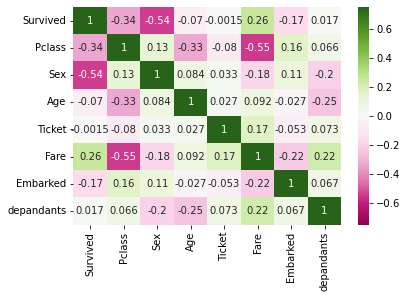

In [435]:
sns.heatmap(df_ana.corr(), annot=True, vmin= -0.75, vmax= 0.75, cmap="PiYG")

In [436]:
# Model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    object 
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Ticket      891 non-null    object 
 5   Fare        891 non-null    float64
 6   Embarked    891 non-null    object 
 7   depandants  891 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 55.8+ KB


In [437]:
df = pd.get_dummies(df, drop_first=True)

In [438]:
df.columns

Index(['Survived', 'Age', 'Fare', 'depandants', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'Ticket_idtick', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [439]:
df.shape

(891, 10)

In [440]:
X = df.drop('Survived', axis=1)
y = df.Survived

In [441]:
from sklearn.model_selection import train_test_split
X_train, X_testt, y_train, y_testt = train_test_split(X,y, train_size=0.99)

In [442]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import *

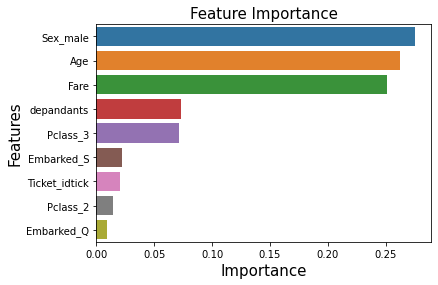

In [443]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})


important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

In [444]:
X_train.columns

Index(['Age', 'Fare', 'depandants', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Ticket_idtick', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [445]:
X_train = X_train.drop(['Ticket_idtick', 'Embarked_Q', 'Embarked_S'], axis=1)

In [446]:
X_testt = X_testt.drop(['Ticket_idtick', 'Embarked_Q', 'Embarked_S'], axis=1)

In [447]:
models=[LogisticRegression(), KNeighborsClassifier(), GaussianNB(), RandomForestClassifier(), XGBClassifier()]
scores=dict()

performance_table = ['Model', 'Accuracy', 'Precision', 'Percentage_mislabbled'
                     'Total_Ones', 'Mislabble_Ones', 'Percent_Mislabbled_Ones', 
                     'Recall_Score', 'F1_Score']

Model = []
Accuracy = []
Precision = []
Percentage_mislabbled = []
Percent_Mislabbled_zeroes =[]
Percent_Mislabbled_Ones =[]
Recall_Score =[]
F1_Score = []


for m in models:
    m.fit(X_train,y_train) # Fitting the model
    y_pred=m.predict(X_testt) # predicting train set
    
    percent_mislabbled = (((y_testt != y_pred).sum())/X_testt.shape[0])*100
    
    y_pred_df = pd.DataFrame(np.array(y_pred), columns= ['ypred'])
    y_testt_df = pd.DataFrame(y_testt.values, columns = ['y_testt'])
    df_test = pd.concat([y_pred_df, y_testt_df], axis=1)
    
    df_test1 = df_test[df_test['y_testt'] == 1]
    df_test0 = df_test[df_test['y_testt'] == 0]
    
    percent_how_many_ones_mislabbled = ((df_test1.y_testt != df_test1.ypred).sum()) / (len(df_test[df_test['y_testt'] == 1])) * 100
    percent_how_many_zeroes_mislabbled = ((df_test0.y_testt != df_test0.ypred).sum()) / (len(df_test[df_test['y_testt'] == 0])) * 100
    
    

    Model.append(m)    
    Accuracy.append(accuracy_score(y_testt,y_pred))
    Precision.append(precision_score(y_testt,y_pred))
    Percentage_mislabbled.append(percent_mislabbled)
    Percent_Mislabbled_zeroes.append(percent_how_many_zeroes_mislabbled)    
    Percent_Mislabbled_Ones.append(percent_how_many_ones_mislabbled)
    Recall_Score.append(recall_score(y_testt,y_pred))
    F1_Score.append(f1_score(y_testt,y_pred))

performance_table = {'Model':Model, 
                     'Accuracy':Accuracy, 
                     'Precision': Precision, 
                     'Percentage_mislabbled':Percentage_mislabbled, 
                     'Percent_Mislabbled_zeroes': Percent_Mislabbled_zeroes,
                     'Percent_Mislabbled_Ones': Percent_Mislabbled_Ones, 
                     'Recall_Score': Recall_Score, 
                     'F1_Score' :F1_Score}

performance_table = pd.DataFrame(performance_table)
performance_table

,Model,Accuracy,Precision,Percentage_mislabbled,Percent_Mislabbled_zeroes,Percent_Mislabbled_Ones,Recall_Score,F1_Score
0,LogisticRegression(),1.000000,1.00,0.000000,0.000000,0.000000,1.000000,1.000000
1,KNeighborsClassifier(),0.888889,1.00,11.111111,0.000000,33.333333,0.666667,0.800000
2,GaussianNB(),1.000000,1.00,0.000000,0.000000,0.000000,1.000000,1.000000
3,"(DecisionTreeClassifier(max_features='sqrt', r...",0.888889,0.75,11.111111,16.666667,0.000000,1.000000,0.857143
4,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.888889,0.75,11.111111,16.666667,0.000000,1.000000,0.857143


In [448]:
# params = [{'criterion': ['entropy', 'gini'],
#                      'n_estimators': [10, 30, 50, 70, 90],
#                      'max_depth': [10, 15, 20],
#                      'max_features': ['sqrt', 'log2'],
#                      'min_samples_split': [2, 5, 8, 11],
#                      'min_samples_leaf': [1, 5, 9],
#                      'max_leaf_nodes': [2, 5, 8, 11]}]
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(RandomForestClassifier(), params)  
# grid.fit(X_train, y_train)     
# print(grid.best_params_)

In [449]:
rfc=RandomForestClassifier(criterion= "entropy", 
                            max_depth= 10, 
                            max_features= "sqrt", 
                            max_leaf_nodes= 7, 
                            min_samples_leaf= 5, 
                            min_samples_split= 5, 
                            n_estimators= 10)


rfc.fit(X_train, y_train)
ypredt = rfc.predict(X_testt)
f1_score(y_testt,y_pred)

0.8571428571428571

In [450]:
# params = [{'n_estimators': [10, 30, 50, 70, 90],
#            'subsample': [0.1, 0.2, 0.3],
#            'max_depth':[2, 3, 4,5, 6],
#            "learning_rate":[0.01, 0.1, 0.2],
#            "gamma":[0, 1, 2, 3]}]
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(XGBClassifier(), params)  
# grid.fit(X_train, y_train)     
# print(grid.best_params_)

In [451]:
xgblrcl=XGBClassifier(gamma= 0,   
                        learning_rate= 0.2, 
                        max_depth= 5, 
                        n_estimators= 90, 
                        subsample= 0.2)

xgblrcl.fit(X_train, y_train)
ypredt = xgblrcl.predict(X_testt)
f1_score(y_testt,y_pred)

0.8571428571428571

In [452]:
from sklearn.ensemble import StackingClassifier

level0 = list()
level0.append(('rfc', RandomForestClassifier(criterion= "entropy", 
                            max_depth= 10, 
                            max_features= "sqrt", 
                            max_leaf_nodes= 7, 
                            min_samples_leaf= 5, 
                            min_samples_split= 5, 
                            n_estimators= 10)))
level0.append(('xgb', XGBClassifier(gamma= 0,   
                        learning_rate= 0.2, 
                        max_depth= 5, 
                        n_estimators= 90, 
                        subsample= 0.2)))

# define meta learner model
level1 = XGBClassifier(gamma= 0,   
                        learning_rate= 0.2, 
                        max_depth= 5, 
                        n_estimators= 90, 
                        subsample= 0.2)

# define the stacking ensemble
stc = StackingClassifier(estimators=level0, final_estimator=level1, cv=20)

# fit the model on all available data
stc.fit(X_train, y_train)
ypredt = stc.predict(X_testt)
f1_score(y_testt,y_pred)

0.8571428571428571

In [453]:
# Test data

In [454]:
df_test = pd.read_csv('test.csv')

In [455]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [456]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [457]:
df_test.drop(["PassengerId", "Name"], axis=1, inplace= True)

In [458]:
df_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [459]:
df_test.Pclass = df_test.Pclass.astype('object')

In [460]:
df_test['depandants'] = df_test['SibSp'] + df_test['Parch']

In [461]:
df_test.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [462]:
df_test.Age = df_test.Age.replace(np.nan, np.mean(df_test.Age))


In [463]:
litit = []
for i in df_test.Ticket:
    if i.isnumeric() == True:
        litit.append(f"Nid")
    else:
        litit.append("idtick")
df_test.Ticket = litit

In [464]:
df_test.drop("Cabin", axis=1, inplace=True)


In [465]:
df_test.Embarked = df_test.Embarked.fillna("S")

In [466]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [467]:
df_test.Fare = df_test.Fare.replace(np.nan, np.mean(df_test.Fare))


In [468]:
df_test.columns

Index(['Age', 'Fare', 'depandants', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Ticket_idtick', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [469]:
X_test = df_test

In [470]:
X_test.isnull().sum()

Age              0
Fare             0
depandants       0
Pclass_2         0
Pclass_3         0
Sex_male         0
Ticket_idtick    0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [471]:
X_test = X_test.drop(['Ticket_idtick', 'Embarked_Q', 'Embarked_S'], axis=1)

In [472]:
y_pred = stc.predict(X_test)

In [473]:
len(X_test)

418

In [474]:
testsub = pd.DataFrame(data= {"PassengerId":range(892, 1310), "Survived":(y_pred)})
testsub.to_csv("subrfc.csv", index=False)